# Computing Firing Rates

As you recall form the [Gerstner reading](https://neuronaldynamics.epfl.ch/online/Ch7.html), there are several ways to think about a neuron's firing rate.

We will first consider spike count rate because it is the most straightforward. The cell below creates some synthetic neural data. The resulting array has a 1 at each time point that contains a spike and zeros elsewhere. We will assume that we are recording for 1 second at 1000 Hz. The simulation below assumes the neuron fires at an average rate of 20 Hz for the first 500 ms and at 60 Hz thereafter.

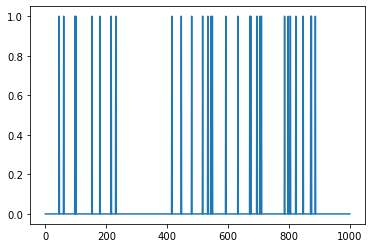

In [10]:
# create synthetic neural response
import numpy as np
import matplotlib.pyplot as plt

timePoints = 1000
p1 = 20/1000
p2 = 60/1000

modelData = np.zeros(timePoints)

for i in range(len(modelData)):
    # for the first 500 ms, fire at 20 Hz, then fire at 60 Hz
    if i < 499:
        p = p1
    else:
        p = p2
        
    if np.random.rand() < p:
        modelData[i] = 1

# plot the synthetic data
plt.figure()
plt.plot(np.arange(0,timePoints), modelData)

Compute the spike count rate for this neuron in the cell below. With your group, **discuss** the advantages and disadvantages to computing firing rate in this way.

In [11]:
spikeCountRate = sum(modelData)
print(spikeCountRate)

30.0


In order to calculate the spike density rate, we need to simulate many trials from this same neuron. Use the template below to simulate 30 trials that are produced with the method outlined above.

Text(0, 0.5, 'Trial number')

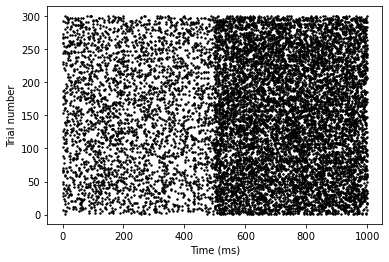

In [16]:
import numpy as np
import matplotlib.pyplot as plt

timePoints = 1000
p1 = 20/1000
p2 = 60/1000

modelData = np.zeros((300, 1000)) # fill this in to be a 30x1000 array

for j in range(300): # fill in loop to reflect 30 trials
    for i in range(timePoints): # fill in accordingly
        # for the first 500 ms, fire at 20 Hz, then fire at 60 Hz
        if i < 499:
            p = p1
        else:
            p = p2
        
        if np.random.rand() < p:
            modelData[j,i] = 1
        
# create a raster plot
time = np.arange(1000)

for i in range(300):
    spikes, = np.nonzero(modelData[i,:])
    
    spikeTimes = time[spikes]
    theseSpikes = np.ones(len(spikes))*i+1
    
    plt.scatter(spikeTimes, theseSpikes, s=2, c='k')

plt.xlabel('Time (ms)')
plt.ylabel('Trial number')

In order to compute the spike density, you will need to sum over trials to plot the number of spikes observed in each time bin. Hint: [**np.sum()**](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) has an optional input called *axis* where axis=0 specifies summing over rows, and axis=1 refers to summing over columns. 

Compute the spike density and plot it versus time.

Text(0, 0.5, 'Spike Density (Spikes per second)')

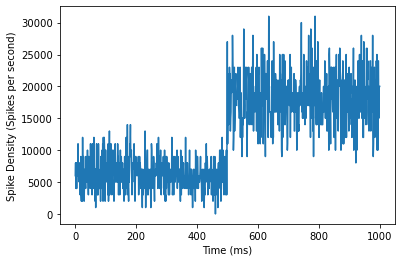

In [17]:
spikeCounts = np.sum(modelData, axis=0)
spikeDensity = (1/(1/1000)) * spikeCounts
time = np.arange(1000)

plt.figure()
plt.plot(time, spikeDensity)
plt.xlabel("Time (ms)")
plt.ylabel("Spike Density (Spikes per second)")

Let's now compute the Fano factor for this simulated data. Recall that this is the variance of the spike count rate over its mean:

$$F = \frac{{\sigma_{sp}}^2}{\mu_{sp}}$$

Loop through each trial and store the spike count rate. Then, use **np.var()** and **np.mean()** to compute the Fano factor.

In [18]:
fano = np.var(modelData) / np.mean(modelData)
print(fano)

0.9592799999999997


Nice work today! Please upload this notebook to Lyceum for grading.